In [1]:
import pandas as pd
import numpy as np
Est539=pd.read_csv(r'C:\Users\HP\Documents\Estadística Climatológica\COSTA_CENTRO\COSTA_CENTRO\ho00000539.txt',header=None, sep='	', na_values='-99.9', names=['Datos','Años','Dias','Pp','Tmax','Tmin'])
print(Est539)

       Datos  Años  Dias   Pp  Tmax  Tmin
0       1965     1     1  0.0  29.7  14.4
1       1965     1     2  0.0  28.7  13.6
2       1965     1     3  0.0  29.9  13.2
3       1965     1     4  0.0  31.1  15.0
4       1965     1     5  0.0  28.3  15.4
...      ...   ...   ...  ...   ...   ...
20083   2019    12    27  0.0  29.8  17.4
20084   2019    12    28  0.0  29.6  18.0
20085   2019    12    29  0.0  30.0  18.4
20086   2019    12    30  0.0  32.0  18.0
20087   2019    12    31  0.0  31.2  18.6

[20088 rows x 6 columns]


In [2]:
time = pd.date_range('1965-1-1','2019-12-31',freq='D')
len(time)

20088

In [3]:
Est539['time'] =time

In [4]:
#del(datos_rain,datos_tmax,datos_tmin)
datos_rain = Est539.loc[Est539["Pp"]  >= 0, "Pp"]
datos_tmin = Est539.loc[Est539["Tmin"]  >= 10, "Tmin"]
datos_tmax = Est539.loc[Est539["Tmax"]  >= 0, "Tmax"]

In [5]:
datos_time = Est539.loc[Est539["Pp"]  >= 0, "time"]

In [6]:
datos_timet = Est539.loc[Est539["Tmax"]  >= 0, "time"]

In [7]:
df_tmax = pd.DataFrame()

In [8]:
df_tmax['time'] = datos_timet.values

In [9]:
df_tmax['tmax'] = datos_tmax.values

In [10]:
df_tmax

,time,tmax
0,1965-01-01,29.7
1,1965-01-02,28.7
2,1965-01-03,29.9
3,1965-01-04,31.1
4,1965-01-05,28.3
...,...,...
19670,2019-12-27,29.8
19671,2019-12-28,29.6
19672,2019-12-29,30.0
19673,2019-12-30,32.0


In [11]:
print("Estadísticas: ", Est539['Tmax'].describe())

Estadísticas:  count    20088.000000
mean        23.480859
std         18.368926
min        -99.900000
25%         22.600000
50%         26.300000
75%         29.800000
max         35.100000
Name: Tmax, dtype: float64


<AxesSubplot:xlabel='time'>

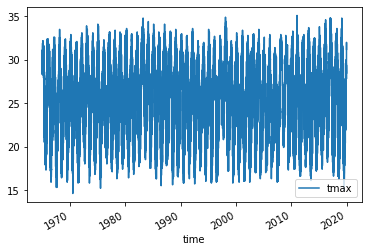

In [12]:
df_tmax.plot(x='time',y='tmax')

Cálculo del índice de días cálidos

In [13]:
df_tmax = df_tmax.reset_index()
df_tmax['year'] =df_tmax.time.dt.year

In [14]:
#calculo de los dias que cumplen la condicion
dias_calidos_anuales = df_tmax[df_tmax.tmax>29.8].groupby('year').count()['tmax'] 

In [15]:
dias_calidos_anuales =dias_calidos_anuales.reset_index()
dias_calidos_anuales

,year,tmax
0,1965,89
1,1966,74
2,1967,89
3,1968,61
4,1969,77
5,1970,64
6,1971,79
7,1972,95
8,1973,87
9,1974,89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='year', ylabel='tmax'>

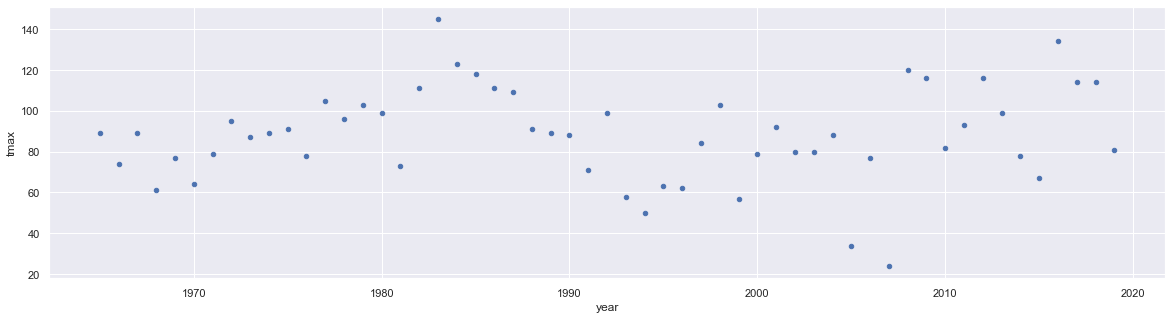

In [49]:
#Primero se inspecciona la data, aparentemente hay una tendencia hasta el año 2000
#(se puede comprobar con la prueba de hipotesis)
dias_calidos_anuales.plot.scatter(x='year',y='tmax')

In [67]:
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})

[None, None]

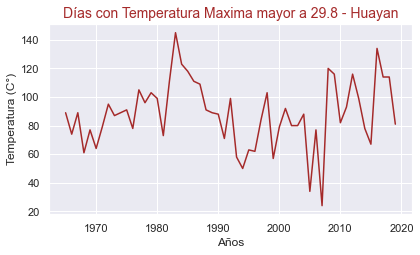

In [68]:
#Días con de Temperatura Maxima mayor al percentil 75
plt.figure(figsize=(6.5,3.5))
line=plt.plot(dias_calidos_anuales['year'], dias_calidos_anuales['tmax'])
plt.xlabel("Años", fontsize = 12)
plt.ylabel("Temperatura (C°)", fontsize = 12)
plt.title('Días con Temperatura Maxima mayor a 29.8 - Huayan', fontsize=14, color='brown')
plt.setp(line, color='brown', linewidth=1.5)

In [69]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dias_calidos_anuales['year'].values,
                       dias_calidos_anuales['tmax'].values)

In [93]:
# caso años 1965 - 2019
print("Valor de p y r: ",p_value ,"y",r_value)
## el pvalor es alto. 
##Por ejemplo, si se toma un alpha de 0.05; pvalor > alpha y por lo tanto se acepta la Ho
## es decir, se acepta que la pendiente es 0, no hay tendencia.
#Se acepta la hipotesis 

Valor de p y r:  0.7869688827068007 y 0.03728403930177078


In [81]:
# caso años 1965 - 1990
slope2, intercept2, r_value2, p_value2, std_err2 = scipy.stats.linregress(
                        dias_calidos_anuales[dias_calidos_anuales.year<=1990]['year'].values,
                        dias_calidos_anuales[dias_calidos_anuales.year<=1990]['tmax'].values)

In [91]:
print("Valor de p y r: ",p_value2 ,"y",r_value2)
## el pvalor disminuye y el nivel de significancia de 0.05 o 0.1 ahora es mayor al p
#Se rechaza la hipotesis
## Se concluye que para estación no hay una tendencia significativa en los días cálidos anuales 

Valor de p y r:  0.003250876798192781 y 0.555016188853102


In [95]:
# caso años 1965 - 1980
slope3, intercept3, r_value3, p_value3, std_err3 = scipy.stats.linregress(
                        dias_calidos_anuales[dias_calidos_anuales.year<=1980]['year'].values,
                        dias_calidos_anuales[dias_calidos_anuales.year<=1980]['tmax'].values)

In [96]:
print("Valor de p y r: ",p_value3 ,"y",r_value3)
## el pvalor disminuye y el nivel de significancia de 0.05 o 0.1 ahora es mayor al p
#Se rechaza la hipotesis

Valor de p y r:  0.0087272969456008 y 0.6312676322522894


Text(0, 0.5, 'Temperatura Máxima (C°)')

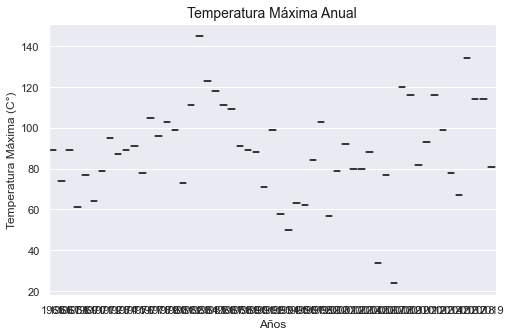

In [73]:

#Grafica de boxplot para temperatura máxima anual
#p=sns.boxplot(x='year', y='tmax', data=dias_calidos_anuales, palette='Spectral_r')
#p.set_title('Temperatura Máxima Anual', fontsize=14, color='k')
#p.set_xlabel("Años", fontsize = 12)
#p.set_ylabel("Temperatura Máxima (C°)", fontsize = 12)